In [1]:
import pandas as pd

# Cargamos los datos de entrenamiento
train = pd.read_csv("train.csv")


In [2]:
# Separamos los datos de entrenamiento en X e y
X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

array([[<AxesSubplot:xlabel='Id', ylabel='Id'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='Id'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='Id'>, ...,
        <AxesSubplot:xlabel='MoSold', ylabel='Id'>,
        <AxesSubplot:xlabel='YrSold', ylabel='Id'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='Id'>],
       [<AxesSubplot:xlabel='Id', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='MSSubClass'>, ...,
        <AxesSubplot:xlabel='MoSold', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='YrSold', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>],
       [<AxesSubplot:xlabel='Id', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='LotFrontage'>, ...,
        <AxesSubplot:xlabel='MoSold', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='YrSold', ylabel='

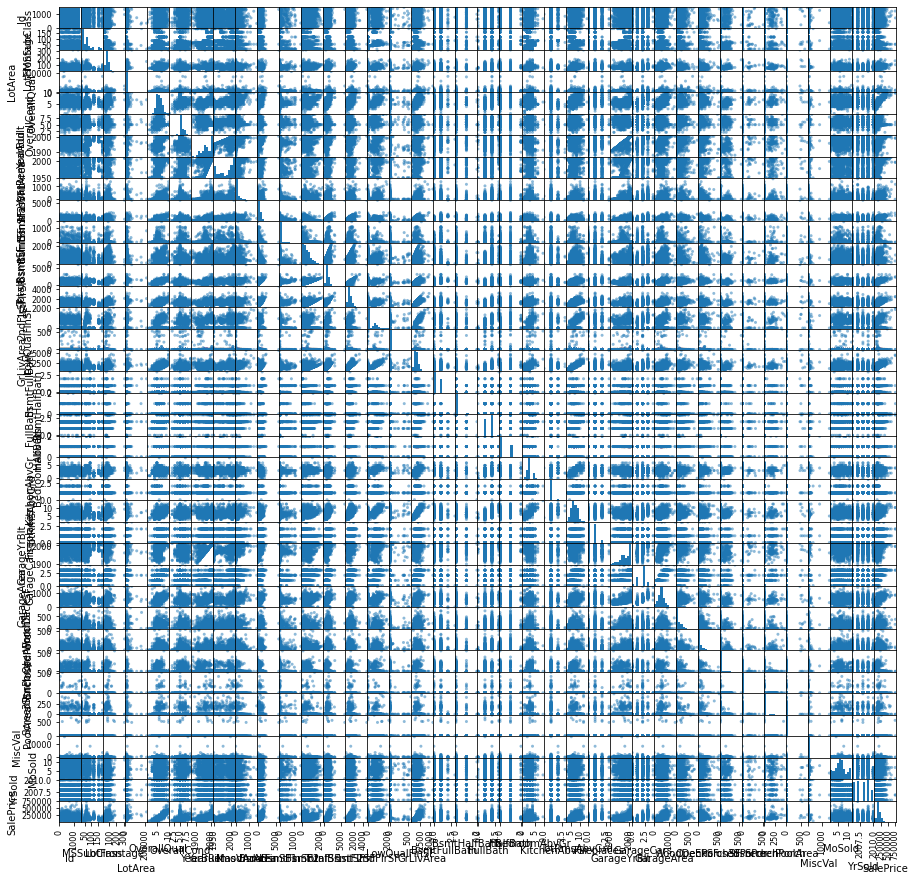

In [3]:
# Exploramos los datos de entrenamiento
train.info()
train.describe()

# Generamos un perfil de los datos
pd.plotting.scatter_matrix(train, figsize=(15, 15))

In [4]:
# Hay varias variables categóricas con valores faltantes

for col in train.select_dtypes(include="object"):
    if train[col].isnull().sum() > 0:
        train[col].fillna(train[col].mode()[0], inplace=True)

# Hay varias variables numéricas con valores faltantes

for col in train.select_dtypes(exclude="object"):
    if train[col].isnull().sum() > 0:
        train[col].fillna(train[col].mean(), inplace=True)

In [5]:
# Importamos PyCaret
import pycaret.regression as pr

model = pr.setup(data=train, target="SalePrice")


,Description,Value
0,Session id,3831
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 275)"
5,Transformed train set shape,"(1021, 275)"
6,Transformed test set shape,"(439, 275)"
7,Ordinal features,4
8,Numeric features,37
9,Categorical features,43


In [16]:
#Entrenamiento y selección de modelos automática
from pycaret.regression import compare_models
best=compare_models(sort='RMSE', exclude=['lar','lr'])

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [17]:
print(best)

GradientBoostingRegressor(random_state=3831)


In [15]:
from pycaret.regression import tune_model
# Optimizamos los hiper-parámetros del modelo de regresión lineal
tuned_best=tune_model(estimator=best)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:28:31
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18825.6612,731101756.5542,27038.8934,0.8756,0.1466,0.1099
1,15873.8586,500854757.2983,22379.7846,0.9400,0.1176,0.0919
2,17851.5681,648473217.2232,25465.1373,0.8190,0.1413,0.1070
3,17280.0677,704764143.9999,26547.3943,0.8631,0.1686,0.1185
4,18064.6026,647603162.6405,25448.0483,0.8616,0.1403,0.1063
5,17036.4850,717207034.5743,26780.7213,0.8840,0.1396,0.0993
6,18937.3632,931442851.0885,30519.5487,0.8979,0.1163,0.0900
7,16402.6704,551230482.1227,23478.2981,0.9277,0.1541,0.0987
8,20707.4406,1002113878.3337,31656.1823,0.8642,0.1407,0.1052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
from pycaret.regression import create_model
gbr=create_model('gbr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
print(gbr)

GradientBoostingRegressor(random_state=3831)


In [28]:
params ={
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.1]
}

tuned_gbr_model = tune_model(
    estimator=gbr,
    optimize='RMSE',
    fold=10,
    n_iter=10,
    custom_grid=params
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13198.7930,407951494.4050,20197.8091,0.9306,0.1182,0.0794
1,14337.0656,488558016.8005,22103.3485,0.9415,0.1075,0.0817
2,15781.4321,445103706.6424,21097.4810,0.8758,0.1195,0.0934
3,17231.8136,623608964.2548,24972.1638,0.8789,0.1669,0.1225
4,16895.6206,530455056.1468,23031.6099,0.8866,0.1210,0.0960
5,16819.5609,610946243.6067,24717.3268,0.9012,0.1276,0.0979
6,18237.2516,1034397447.9304,32162.0498,0.8866,0.1214,0.0907
7,14575.6932,657480194.4665,25641.3766,0.9138,0.1067,0.0788
8,15621.5988,511771439.2465,22622.3659,0.9306,0.1114,0.0839


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
from pycaret.regression import finalize_model
final_model=finalize_model(estimator=best)

In [32]:
#Almacenamiento del pipeline en el disco duro
from pycaret.regression import save_model
save_model(model=final_model, model_name='model_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'Hal...
                                                                     'Exterior1st',
                                                                     'Exterior2nd',
             

### Predicciones

In [47]:
from pycaret.regression import load_model
predicciones = predict_model(model, data=train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,10746.5588,215151847.1703,14668.0553,0.9659,0.0905,0.0658
